In [1]:
import cv2
import numpy as np
from mach.data import raw_train_data, crop_image, augment_image_brightness, average_optical_flow_dense
from mach.data import translate_image, stretch_image, augment_image, augment_images
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def img_from_file(file):
  img = cv2.imread(file)
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def show_3(img1, img2, img3):
  plt.subplot(1,3,1)
  plt.imshow(img1)
  plt.axis('off')
  plt.subplot(1,3,2)
  plt.imshow(img2)
  plt.axis('off')
  plt.subplot(1,3,3)
  plt.imshow(img3)
  plt.axis('off')
  plt.show()

In [3]:
img_files, img_speeds = raw_train_data()
img_file = img_files[100]
img = img_from_file(img_file)

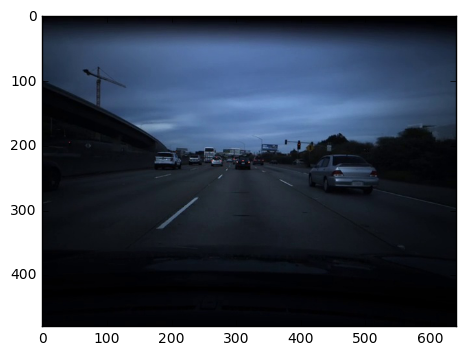

In [4]:
plt.imshow(img)
plt.show()

original size: (480, 640, 3)
crop size: (196, 576, 3)


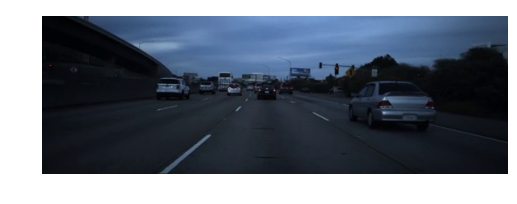

In [5]:
print("original size:", img.shape)
crop_size = (134,330,32,608)
plt.imshow(crop_image(img, crop_size))
print("crop size:", crop_image(img, crop_size).shape)
plt.axis('off')
plt.show()

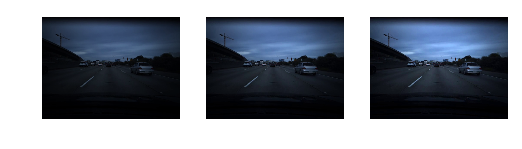

In [6]:
brightness_min = 0.7
brightness_max = 1.25
show_3(augment_image_brightness(img, brightness_min),
      img,
      augment_image_brightness(img, brightness_max))

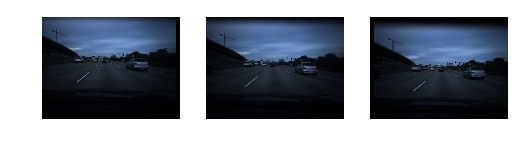

In [7]:
translation_x_min = -20
translation_x_max = 20
translation_y_min = -20
translation_y_max = 20

show_3(translate_image(img, translation_x_min, translation_y_min),
       img, 
       translate_image(img, translation_x_max, translation_y_max))

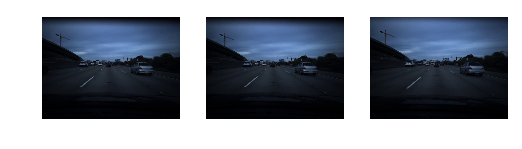

In [8]:
scale_x1_min = 0
scale_x2_min = 0
scale_y1_min = 0
scale_y2_min = 0
scale_x1_max = 20
scale_x2_max = 20
scale_y1_max = 20
scale_y2_max = 20

show_3(stretch_image(img, scale_x1_min, scale_x2_min, scale_y1_min, scale_y2_min),
       img,
       stretch_image(img, scale_x1_max, scale_x2_max, scale_y1_max, scale_y2_max))

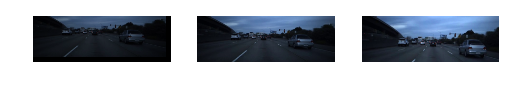

In [9]:
image_size = (288, 98) 
min_aug = augment_image(img, crop_size, image_size, brightness_min, translation_x_min, translation_y_min, 
                       scale_x1_min, scale_x2_min, scale_y1_min, scale_y2_min)
max_aug = augment_image(img, crop_size, image_size, brightness_max, translation_x_max, translation_y_max, 
                       scale_x1_max, scale_x2_max, scale_y1_max, scale_y2_max)

show_3(min_aug, cv2.resize(crop_image(img, crop_size), image_size), max_aug)

(98, 288, 3)


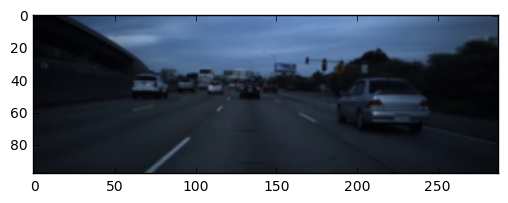

In [10]:
aug_image = augment_images([img])[0]
print(aug_image.shape)
plt.imshow(aug_image)
plt.show()

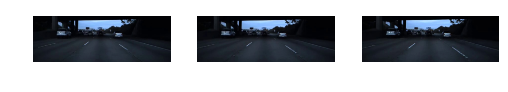

In [11]:
show_3(*augment_images(map(img_from_file, img_files[10:13])))

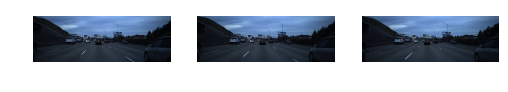

In [12]:
show_3(*augment_images(map(img_from_file, img_files[150:153])))

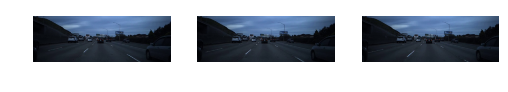

In [13]:
show_3(*augment_images(map(img_from_file, img_files[150:153])))

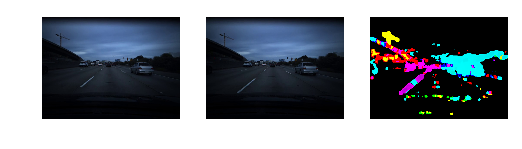

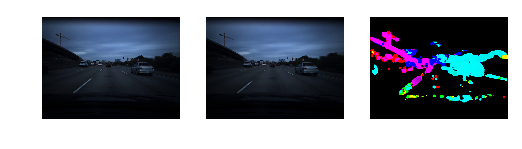

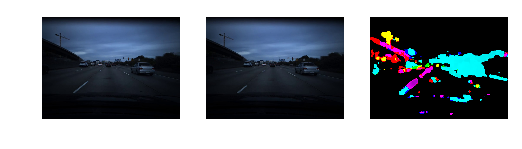

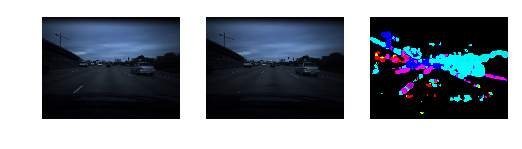

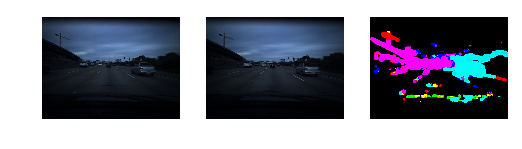

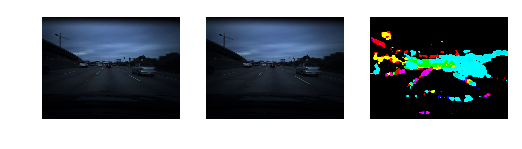

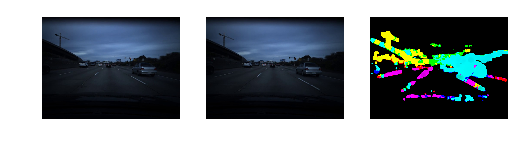

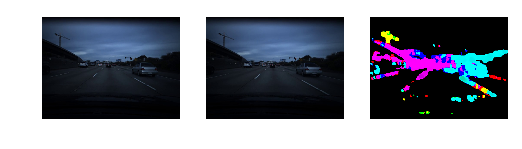

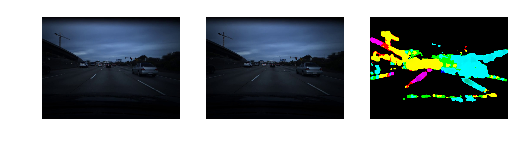

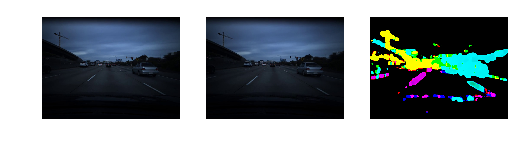

In [14]:
for i in range(100, 110):
  old, new = list(map(img_from_file, img_files[i:i+2]))
  flow = average_optical_flow_dense([old, new])
  show_3(old, new, flow)

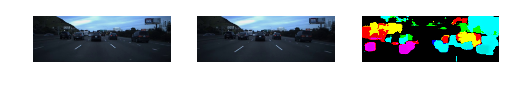

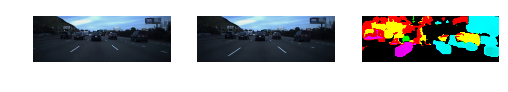

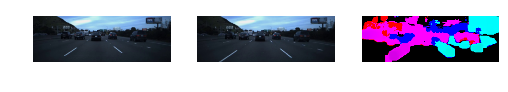

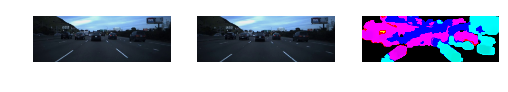

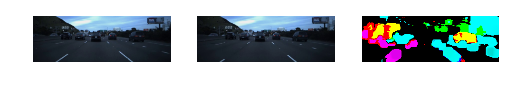

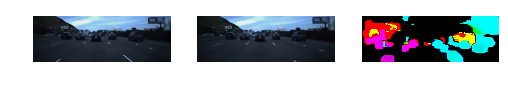

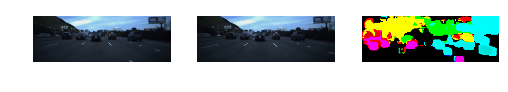

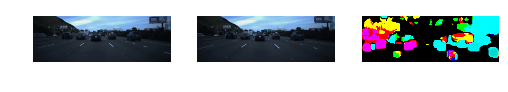

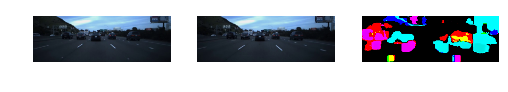

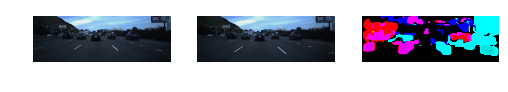

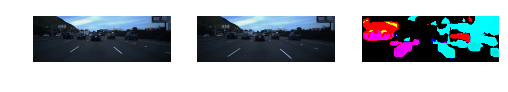

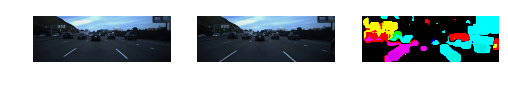

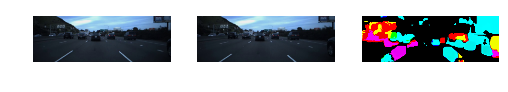

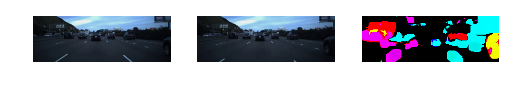

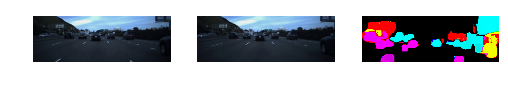

In [15]:
aug_images = augment_images(map(img_from_file, img_files[400:431]))
num_imgs = 2
for i in range(0, len(aug_images) - 1, num_imgs):
  old = aug_images[i]
  new = aug_images[i+num_imgs]
  flow = average_optical_flow_dense(aug_images[i:i+num_imgs])
  show_3(old, new, flow)

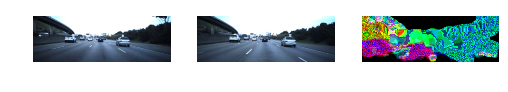

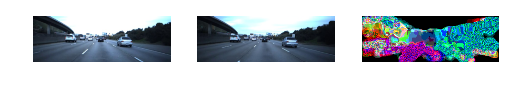

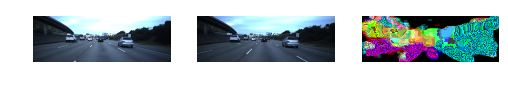

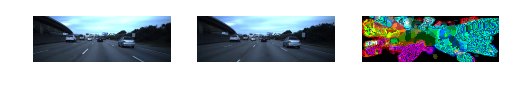

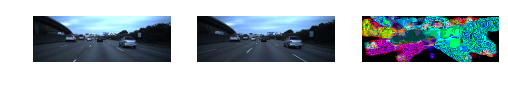

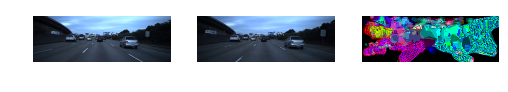

In [16]:
aug_images = augment_images(map(img_from_file, img_files[50:81]))
num_imgs = 5
for i in range(0, len(aug_images) - 1, num_imgs):
  old = aug_images[i]
  new = aug_images[i+num_imgs]
  flow = average_optical_flow_dense(aug_images[i:i+num_imgs])
  show_3(old, new, flow)

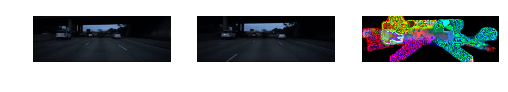

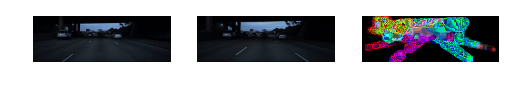

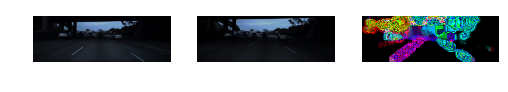

In [17]:
aug_images = augment_images(map(img_from_file, img_files[0:22]))
num_imgs = 7
for i in range(0, len(aug_images) - 1, num_imgs):
  old = aug_images[i]
  new = aug_images[i+num_imgs]
  flow = average_optical_flow_dense(aug_images[i:i+num_imgs])
  show_3(old, new, flow)